<a href="https://colab.research.google.com/github/Sheega-ameenah/Data_Science/blob/main/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating Neural network for Regression problem**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full ,y_test = train_test_split(housing.data, housing.target,random_state=42)
X_train,X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_valid= scaler.transform(X_valid)
X_test= scaler.transform(X_test)


In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model= keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='mean_squared_error',
              optimizer= keras.optimizers.SGD(learning_rate=1e-3),
              metrics= ['mae'])

In [12]:
model_history= model.fit(X_test,y_test, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
162/162 [==============================] - 2s 7ms/step - loss: 2.6098 - mae: 1.2286 - val_loss: 8.9206 - val_mae: 0.9282
Epoch 2/20
162/162 [==============================] - 1s 9ms/step - loss: 1.3258 - mae: 0.8001 - val_loss: 4.5124 - val_mae: 0.7607
Epoch 3/20
162/162 [==============================] - 1s 8ms/step - loss: 0.8566 - mae: 0.6904 - val_loss: 1.7973 - val_mae: 0.6753
Epoch 4/20
162/162 [==============================] - 1s 6ms/step - loss: 0.7452 - mae: 0.6433 - val_loss: 0.8874 - val_mae: 0.6278
Epoch 5/20
162/162 [==============================] - 1s 8ms/step - loss: 0.6976 - mae: 0.6183 - val_loss: 0.6718 - val_mae: 0.5982
Epoch 6/20
162/162 [==============================] - 2s 10ms/step - loss: 0.6691 - mae: 0.6023 - val_loss: 0.6556 - val_mae: 0.5872
Epoch 7/20
162/162 [==============================] - 2s 12ms/step - loss: 0.6474 - mae: 0.5908 - val_loss: 0.6586 - val_mae: 0.5799
Epoch 8/20
162/162 [==============================] - 1s 9ms/step - loss: 

In [13]:
model_history.history

{'loss': [2.609841823577881,
  1.3257609605789185,
  0.8565865755081177,
  0.7452305555343628,
  0.697627604007721,
  0.6690936088562012,
  0.6474342346191406,
  0.6284040212631226,
  0.6102874279022217,
  0.5946487784385681,
  0.5783991813659668,
  0.563431441783905,
  0.5501341223716736,
  0.5364208817481995,
  0.5238007307052612,
  0.5117368102073669,
  0.5007355213165283,
  0.48968586325645447,
  0.4800868332386017,
  0.4703215956687927],
 'mae': [1.2286497354507446,
  0.8001475930213928,
  0.6904228329658508,
  0.6433179378509521,
  0.618338942527771,
  0.6023121476173401,
  0.5907865166664124,
  0.5828253030776978,
  0.5729359984397888,
  0.5654861927032471,
  0.5576070547103882,
  0.548686683177948,
  0.544342577457428,
  0.5364907383918762,
  0.5283050537109375,
  0.5234135985374451,
  0.5155736207962036,
  0.5106555223464966,
  0.5059599876403809,
  0.5003087520599365],
 'val_loss': [8.92059326171875,
  4.512385368347168,
  1.7972856760025024,
  0.8873626589775085,
  0.6717652

In [14]:
mae_test= model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.4649 - mae: 0.4980


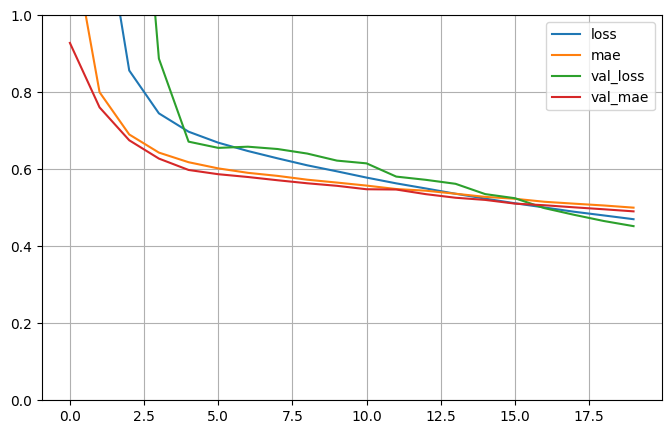

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
X_new= X_test[:3]

In [17]:
y_pred= model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 101ms/step
[[0.7028322]
 [1.640547 ]
 [3.0608199]]
[0.477   0.458   5.00001]


**Using functional API for complex architectures**

In [18]:
del model

In [19]:
keras.backend.clear_session()

In [20]:
X_train.shape[:1]

(11610,)

In [21]:
input_= keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation= 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation= 'relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model= keras.models.Model(inputs= [input_],outputs=[output])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [23]:
model.compile(loss= 'mean_squared_error',
            optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics= ['mae'])

In [28]:
model_history= model.fit(X_train,y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3765 - mae: 0.4412 - val_loss: 0.3695 - val_mae: 0.4289
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3749 - mae: 0.4401 - val_loss: 0.4671 - val_mae: 0.4368
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3737 - mae: 0.4399 - val_loss: 0.3989 - val_mae: 0.4294
Epoch 4/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3720 - mae: 0.4383 - val_loss: 0.3694 - val_mae: 0.4295
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3709 - mae: 0.4377 - val_loss: 0.3677 - val_mae: 0.4274
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.3693 - mae: 0.4368 - val_loss: 0.4065 - val_mae: 0.4282
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3684 - mae: 0.4356 - val_loss: 0.3663 - val_mae: 0.4262
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [29]:
model_history.history

{'loss': [0.3764931857585907,
  0.37485626339912415,
  0.37367549538612366,
  0.37201908230781555,
  0.3709457814693451,
  0.3693009912967682,
  0.36842018365859985,
  0.36695873737335205,
  0.36576253175735474,
  0.36466506123542786,
  0.36406728625297546,
  0.36249127984046936,
  0.3625372350215912,
  0.3607499301433563,
  0.3597407639026642,
  0.35911068320274353,
  0.35804006457328796,
  0.35754668712615967,
  0.35632413625717163,
  0.3556424379348755,
  0.3552919030189514,
  0.35395124554634094,
  0.3540671467781067,
  0.35296738147735596,
  0.35236141085624695,
  0.35161250829696655,
  0.3513704240322113,
  0.35055404901504517,
  0.3502368927001953,
  0.34900978207588196,
  0.34916719794273376,
  0.34798920154571533,
  0.34816476702690125,
  0.3471938669681549,
  0.3465214967727661,
  0.3465244472026825,
  0.3459339439868927,
  0.3454410433769226,
  0.34489989280700684,
  0.3443025052547455],
 'mae': [0.4412308633327484,
  0.44011425971984863,
  0.43989336490631104,
  0.438308537

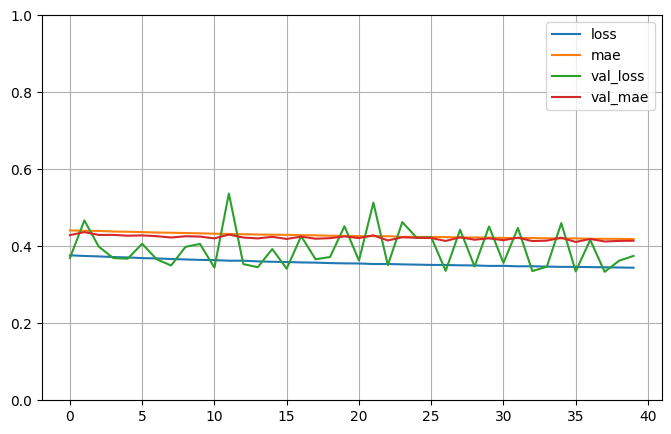

In [30]:
pd.DataFrame(model_history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Saving-restoring models using callbacks

### Saving and Restoring

In [31]:
model.save('my_func_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
%pwd

'/content'

In [34]:
del model

In [35]:
keras.backend.clear_session()

In [37]:
model= keras.models.load_model('my_func_model.h5')

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_1[0][0]']         

In [39]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 147ms/step


array([[0.64222723],
       [1.6041319 ],
       [4.060818  ]], dtype=float32)

## Using Callbacks during Training

In [40]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation= 'relu', input_shape= [8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)

])

In [43]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(learning_rate= 1e-3))

In [44]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Model - {epoch:02d}.h5')

In [45]:
from sklearn.utils import validation
from IPython.core import history
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks= [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 4s 7ms/step - loss: 2.1709 - val_loss: 2.0777
Epoch 2/10
 32/363 [=>............................] - ETA: 1s - loss: 1.1043

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 4ms/step - loss: 0.8375 - val_loss: 0.8012
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6664 - val_loss: 0.5910
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5790 - val_loss: 0.5349
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5244 - val_loss: 0.4763
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4853 - val_loss: 0.4609
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4610 - val_loss: 0.4272
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4443 - val_loss: 0.4142
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4329 - val_loss: 0.4207
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4250 - val_loss: 0.4252


### Best model only

In [46]:
del model
keras.backend.clear_session()

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation= 'relu', input_shape= [8]),
    keras.layers.Dense(30, activation= 'relu'),
    keras.layers.Dense(1)
])

In [48]:
model.compile(loss='mse', optimizer= keras.optimizers.SGD(learning_rate=1e-3))

In [49]:
checkpoint_cb= keras.callbacks.ModelCheckpoint('Best_Model.h5', save_best_only= True)

In [50]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks= [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8276 - val_loss: 1.1827
Epoch 2/10
 34/363 [=>............................] - ETA: 1s - loss: 0.9112

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 3ms/step - loss: 0.7271 - val_loss: 0.6874
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6549 - val_loss: 0.6068
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6106 - val_loss: 0.5580
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5501
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5462 - val_loss: 0.5015
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5226 - val_loss: 0.4823
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5034 - val_loss: 0.4970
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4862 - val_loss: 0.4494
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4724 - val_loss: 0.4374


In [51]:
model = keras.models.load_model('Best_Model.h5')
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 2ms/step - loss: 0.4588


## Best Model only (with patience level)

In [52]:
del model
keras.backend.clear_session()

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation= 'relu', input_shape= [8]),
    keras.layers.Dense(30, activation= 'relu'),
    keras.layers.Dense(1)
])

In [54]:
model.compile(loss='mse', optimizer= keras.optimizers.SGD(learning_rate=1e-3))

In [55]:
checkpoint_cb= keras.callbacks.ModelCheckpoint('early_stop_Model.h5', save_best_only= True)

In [57]:
early_stopping_cb= keras.callbacks.EarlyStopping(
    patience =10,
    restore_best_weights= True
)
# patience: Number of epochs with no improvement after which training will be stopped

In [59]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5720 - val_loss: 0.5171
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5372 - val_loss: 0.4879
Epoch 3/200
363/363 [==============================] - 1s 4ms/step - loss: 0.5110 - val_loss: 0.4645
Epoch 4/200
363/363 [==============================] - 1s 4ms/step - loss: 0.4908 - val_loss: 0.4521
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4756 - val_loss: 0.4394
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4633 - val_loss: 0.4317
Epoch 7/200
363/363 [==============================] - 1s 3ms/step - loss: 0.4536 - val_loss: 0.4296
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4455 - val_loss: 0.4248
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4387 - val_loss: 0.4230
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4329 - val_lo

In [60]:
model = keras.models.load_model('early_stop_Model.h5')
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 5ms/step - loss: 0.4272
